### IMPORTING LIBRARIES

In [159]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### LOADING DATA SET

In [160]:
df=pd.read_csv("loan_approval_dataset.csv")

### DATA ANALYSIS

In [161]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [162]:
df.columns = df.columns.str.strip()

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [164]:
df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [165]:
df.describe()
df=df.drop('loan_id',axis=1)

In [166]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


### DATA VISUALIZATION

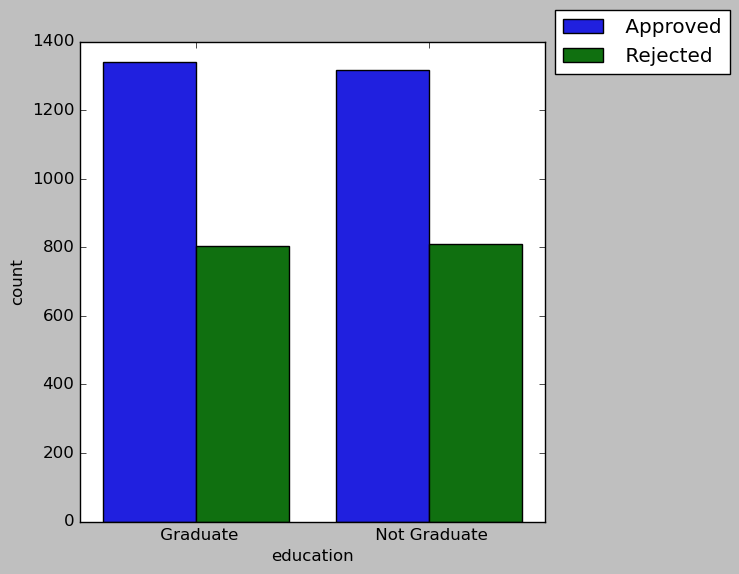

In [167]:
plt.figure(figsize=(6,6),dpi=100)
sns.countplot(x='education',hue='loan_status',data=df)
plt.legend(loc='center left', bbox_to_anchor=(1, 1))

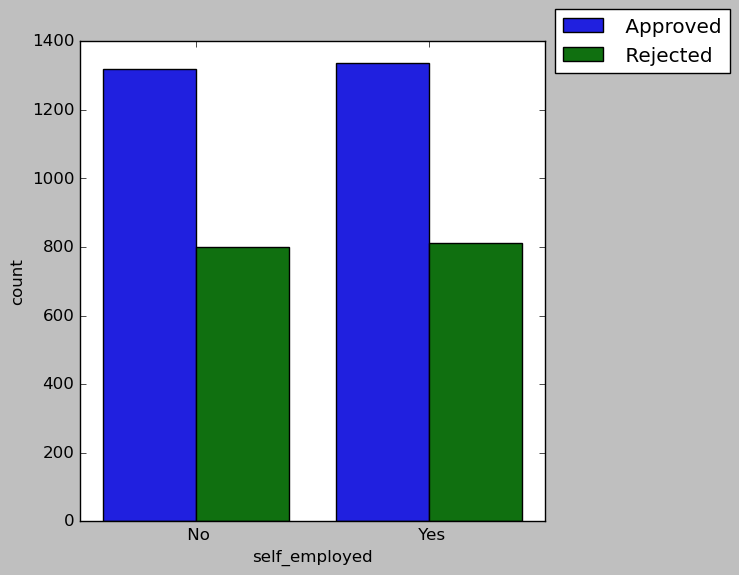

In [168]:
plt.figure(figsize=(6,6),dpi=100)
sns.countplot(x='self_employed',hue='loan_status',data=df)
plt.legend(loc='center left', bbox_to_anchor=(1, 1))

### CONVRTING CATEGORICAL VALUES TO NUMERICAL

In [169]:
df['loan_status'].value_counts()

 Approved    2656
 Rejected    1613
Name: loan_status, dtype: int64

In [170]:
df['loan_status']=pd.get_dummies(df['loan_status'],drop_first=True)

In [171]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [172]:
df['no_of_dependents'].value_counts()

4    752
3    727
0    712
2    708
1    697
5    673
Name: no_of_dependents, dtype: int64

In [173]:
df['self_employed'].value_counts()

 Yes    2150
 No     2119
Name: self_employed, dtype: int64

In [174]:
df['education'].value_counts()

 Graduate        2144
 Not Graduate    2125
Name: education, dtype: int64

In [175]:
df['education']=pd.get_dummies(df['education'],drop_first=True)
df['self_employed']=pd.get_dummies(df['self_employed'],drop_first=True)

In [176]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   no_of_dependents          4269 non-null   int64
 1   education                 4269 non-null   uint8
 2   self_employed             4269 non-null   uint8
 3   income_annum              4269 non-null   int64
 4   loan_amount               4269 non-null   int64
 5   loan_term                 4269 non-null   int64
 6   cibil_score               4269 non-null   int64
 7   residential_assets_value  4269 non-null   int64
 8   commercial_assets_value   4269 non-null   int64
 9   luxury_assets_value       4269 non-null   int64
 10  bank_asset_value          4269 non-null   int64
 11  loan_status               4269 non-null   uint8
dtypes: int64(9), uint8(3)
memory usage: 312.8 KB


In [178]:
df['assets']=df['residential_assets_value']+df['commercial_assets_value']+df['luxury_assets_value']+df['bank_asset_value']

In [179]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,assets
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,50700000
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,17000000
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1,57700000
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1,52700000
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,55000000


In [180]:
df=df.drop(['residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value'],axis=1)

In [181]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,assets
0,2,0,0,9600000,29900000,12,778,0,50700000
1,0,1,1,4100000,12200000,8,417,1,17000000
2,3,0,0,9100000,29700000,20,506,1,57700000
3,3,0,0,8200000,30700000,8,467,1,52700000
4,5,1,1,9800000,24200000,20,382,1,55000000


In [182]:
# separating the data and label
X = df.drop(columns=['loan_status'],axis=1)
y = df['loan_status']

In [183]:
X.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,assets
0,2,0,0,9600000,29900000,12,778,50700000
1,0,1,1,4100000,12200000,8,417,17000000
2,3,0,0,9100000,29700000,20,506,57700000
3,3,0,0,8200000,30700000,8,467,52700000
4,5,1,1,9800000,24200000,20,382,55000000


## HANDLE IMBALANCED DATA SET 

In [184]:
from imblearn.over_sampling import SMOTE

In [185]:
X,y = SMOTE().fit_resample(X,y)

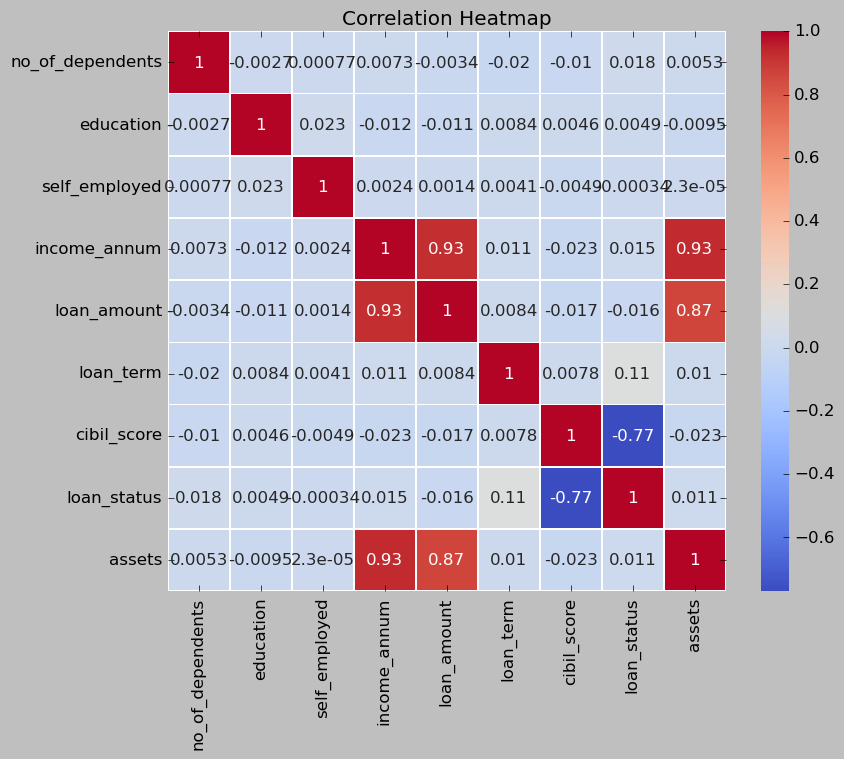

In [186]:
plt.figure(figsize=(9, 7),dpi=100)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Train Test Split

In [187]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay
from matplotlib import style
style.use('ggplot')

In [188]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [189]:
model_df={}
def model_val(model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,
                                                   test_size=0.20,
                                                   random_state=42)
    X_train= scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f"accuracy is {accuracy_score(y_test,y_pred):.2f}")
    score = accuracy_score(y_test,y_pred)
    model_df[model]=round(np.mean(score)*100,2)
    print("\n\n")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("\n\n")
    style.use('classic')
    cm = confusion_matrix(y_test,y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
    disp.plot()

In [190]:
model_df_tuned={}
def model_val_tuned(model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,
                                                   test_size=0.20,
                                                   random_state=42)
    X_train= scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    model.fit(X_train,y_train)
    best_params = model.best_params_
    best_model = model.best_estimator_
    print(best_params,"\n")
    y_pred=best_model.predict(X_test)
    print(f"accuracy is {accuracy_score(y_test,y_pred):.2f}")
    score = accuracy_score(y_test,y_pred)
    model_df[model]=round(np.mean(score)*100,2)
    print("\n\n")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("\n\n")
    style.use('classic')
    cm = confusion_matrix(y_test,y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
    disp.plot()

## Training the model:



### LOGISTIC REGRESSOR CLASSIFIER

accuracy is 0.93



              precision    recall  f1-score   support

           0       0.93      0.92      0.92       502
           1       0.93      0.93      0.93       561

    accuracy                           0.93      1063
   macro avg       0.93      0.93      0.93      1063
weighted avg       0.93      0.93      0.93      1063

[[460  42]
 [ 37 524]]





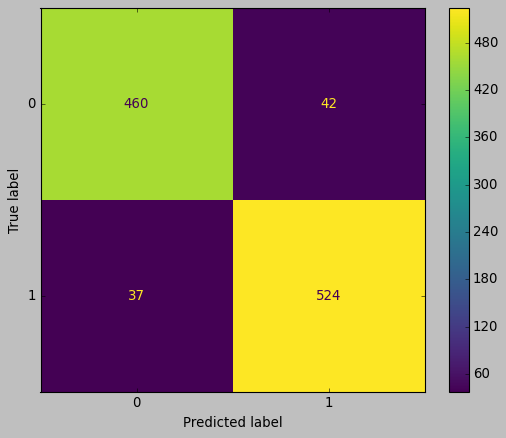

In [191]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model_val(model,X,y)

### GRID SEARCH

In [192]:
from sklearn.model_selection import GridSearchCV


In [193]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'l1_ratio' : [0.1,0.5,1],
               'penalty' :['l1', 'l2', 'elasticnet']
             }


{'C': 0.1, 'l1_ratio': 0.1, 'penalty': 'l2'} 

accuracy is 0.93



              precision    recall  f1-score   support

           0       0.93      0.92      0.92       502
           1       0.93      0.94      0.93       561

    accuracy                           0.93      1063
   macro avg       0.93      0.93      0.93      1063
weighted avg       0.93      0.93      0.93      1063

[[461  41]
 [ 36 525]]





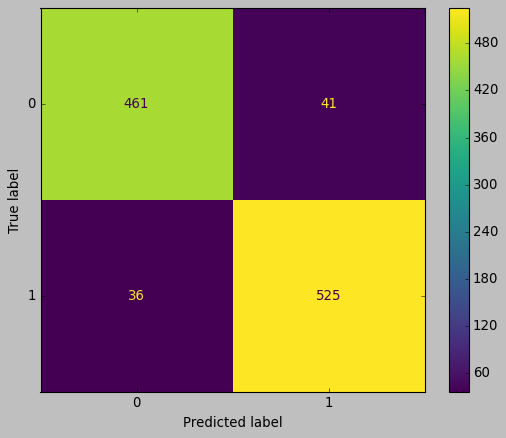

In [194]:
grid_search_Log = GridSearchCV(LogisticRegression(), param_grid, scoring='accuracy')
model_val_tuned(grid_search_Log,X,y)

### Support Vector Classifier


In [195]:
from sklearn.svm import SVC

accuracy is 0.95



              precision    recall  f1-score   support

           0       0.95      0.94      0.95       502
           1       0.95      0.96      0.95       561

    accuracy                           0.95      1063
   macro avg       0.95      0.95      0.95      1063
weighted avg       0.95      0.95      0.95      1063

[[473  29]
 [ 23 538]]





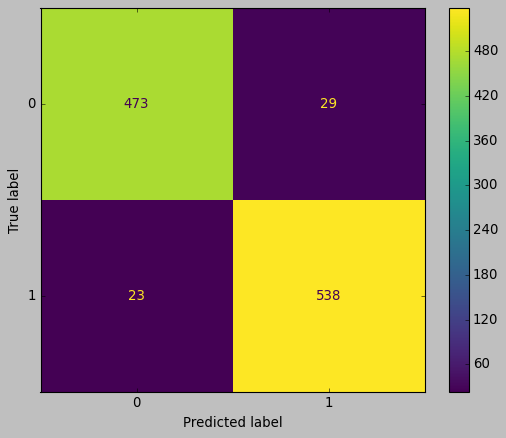

In [196]:
model_svc = SVC(kernel='rbf', C=1.0)
model_val(model_svc,X,y)

### GRID SEARCH

In [197]:
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search_SVC = GridSearchCV(SVC(class_weight={0: 2, 1: 1}), param_grid, scoring='recall')

{'C': 10, 'kernel': 'rbf'} 

accuracy is 0.96



              precision    recall  f1-score   support

           0       0.93      0.99      0.96       502
           1       0.99      0.94      0.96       561

    accuracy                           0.96      1063
   macro avg       0.96      0.96      0.96      1063
weighted avg       0.96      0.96      0.96      1063

[[495   7]
 [ 36 525]]





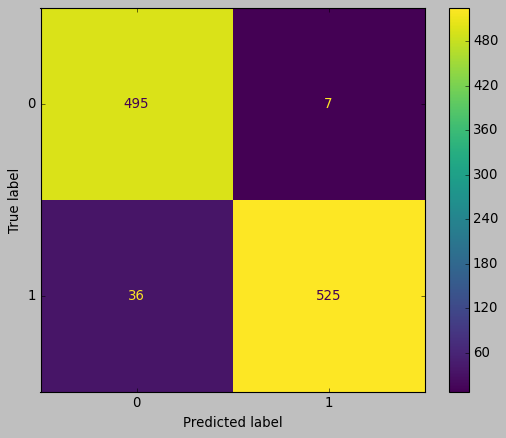

In [198]:
model_val_tuned(grid_search_SVC,X,y)

### DECISION TREES

In [199]:
from sklearn.tree import DecisionTreeClassifier

accuracy is 0.98



              precision    recall  f1-score   support

           0       0.97      0.99      0.98       502
           1       0.99      0.98      0.98       561

    accuracy                           0.98      1063
   macro avg       0.98      0.98      0.98      1063
weighted avg       0.98      0.98      0.98      1063

[[497   5]
 [ 13 548]]





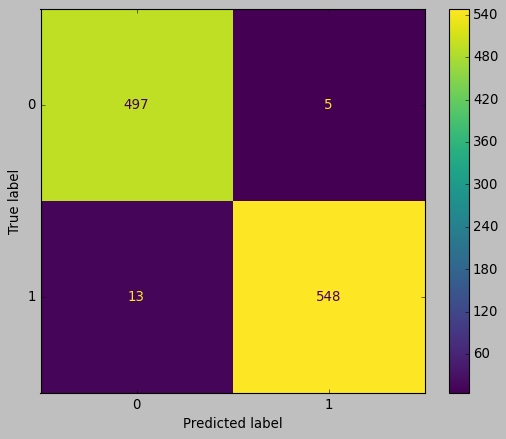

In [200]:
dtc = DecisionTreeClassifier()
model_val(dtc,X,y)

### RANDOM FOREST CLASSIFIER

In [201]:
from sklearn.ensemble import RandomForestClassifier

accuracy is 0.97



              precision    recall  f1-score   support

           0       0.96      0.98      0.97       502
           1       0.98      0.97      0.97       561

    accuracy                           0.97      1063
   macro avg       0.97      0.97      0.97      1063
weighted avg       0.97      0.97      0.97      1063

[[491  11]
 [ 18 543]]





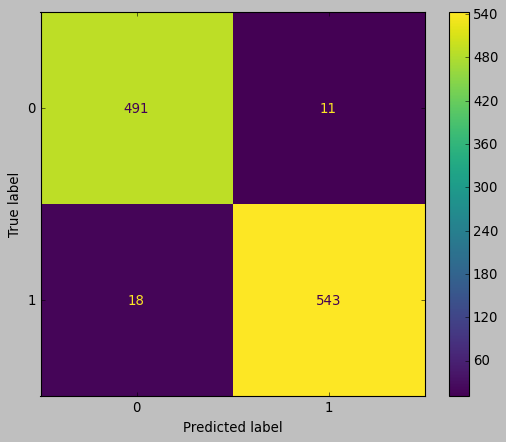

In [202]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_val(rf,X,y)

### GRADIENT BOOSTING 

In [203]:
from sklearn.ensemble import GradientBoostingClassifier

accuracy is 0.98



              precision    recall  f1-score   support

           0       0.96      0.99      0.97       502
           1       0.99      0.97      0.98       561

    accuracy                           0.98      1063
   macro avg       0.98      0.98      0.98      1063
weighted avg       0.98      0.98      0.98      1063

[[495   7]
 [ 19 542]]





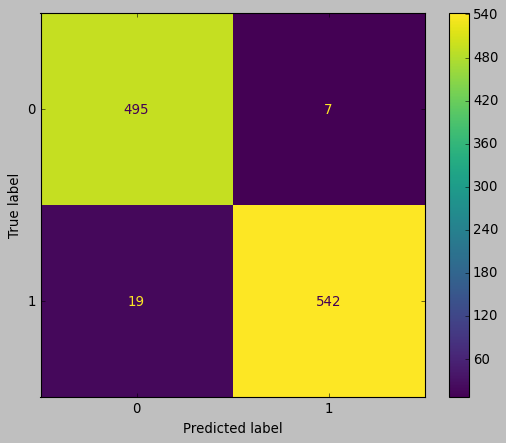

In [204]:
model =GradientBoostingClassifier()
model_val(model,X,y)

### TESTING WITH USER INPUT

In [205]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5312 entries, 0 to 5311
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   no_of_dependents  5312 non-null   int64
 1   education         5312 non-null   uint8
 2   self_employed     5312 non-null   uint8
 3   income_annum      5312 non-null   int64
 4   loan_amount       5312 non-null   int64
 5   loan_term         5312 non-null   int64
 6   cibil_score       5312 non-null   int64
 7   assets            5312 non-null   int64
dtypes: int64(6), uint8(2)
memory usage: 259.5 KB


In [212]:
def predict_input():
    feature_info = {
        'no_of_dependents':int,
        'education': str,
        'self_employed': str,
        'income_annum': int,
        'loan_amount': int,
        'loan_term': int,
        'cibil_score': int,
        'residential_assets_value': int,
        'commercial_assets_value': int,
        'luxury_assets_value': int,
        'bank_asset_value': int 
    }
    
    
    user_input = {}
    for feature_name, data_type in feature_info.items():
        value = input(f"Enter {feature_name}: ")
        user_input[feature_name] = data_type(value)
        
        
    user_input['self_employed'] = 1 if user_input['self_employed'].lower() == 'yes' else 0
    user_input['education'] = 0 if user_input['education'].lower() == 'graduate' else 1
    
    user_df = pd.DataFrame([user_input])
    
    user_df['assets']=user_df['residential_assets_value']+user_df['commercial_assets_value']+user_df['luxury_assets_value']+user_df['bank_asset_value']
    
    user_df=user_df.drop(['residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value'],axis=1)
    
    scaled_df=scaler.transform(user_df)
    result = rf.predict(scaled_df)
    if result==0:
        print("Loan Approved")
    else:
        print("Loan Not Approved")

### LOAN NOT APPROVED

In [ ]:
#0	Not Graduate	Yes	4100000	12200000	8	417	2700000	2200000	8800000	3300000

In [213]:
predict_input()

Enter no_of_dependents: 0
Enter education: Not Graduate
Enter self_employed: yes
Enter income_annum: 4100000
Enter loan_amount: 12200000
Enter loan_term: 8
Enter cibil_score: 417
Enter residential_assets_value: 2700000
Enter commercial_assets_value: 2200000
Enter luxury_assets_value: 8800000
Enter bank_asset_value: 3300000
Loan Not Approved


### LOAN APPROVED 

In [215]:
#2	Graduate	No	9600000	29900000	12	778	2400000	17600000	22700000	8000000

In [216]:
predict_input()

Enter no_of_dependents: 2
Enter education: Graduate
Enter self_employed: NO
Enter income_annum: 9600000
Enter loan_amount: 29900000
Enter loan_term: 12
Enter cibil_score: 778
Enter residential_assets_value: 2400000
Enter commercial_assets_value: 17600000
Enter luxury_assets_value: 22700000
Enter bank_asset_value: 8000000
Loan Approved
